Kaggle:https://www.kaggle.com/sdolezel/black-friday



In [117]:
# ライブラリのインポート  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [118]:
## データセットの読み込み
train = pd.read_csv('train.csv')
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [119]:
#カラムの種類
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [120]:
#データのサイズ
train.shape

(550068, 12)

In [121]:
#データの統計情報
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [122]:
#　データ型、欠損値の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [123]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

欠損が多いカラムProduct_Category_3は今回は使用せずに分析していく。

## データの可視化とEDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

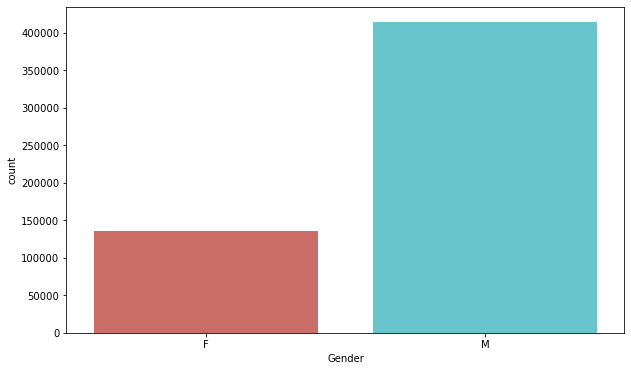

In [124]:
#ジェンダー比率の確認
plt.figure(figsize=(10,6))
sns.countplot(data=train,x='Gender',palette='hls')

C:\Users\ritch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ritch\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritch\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


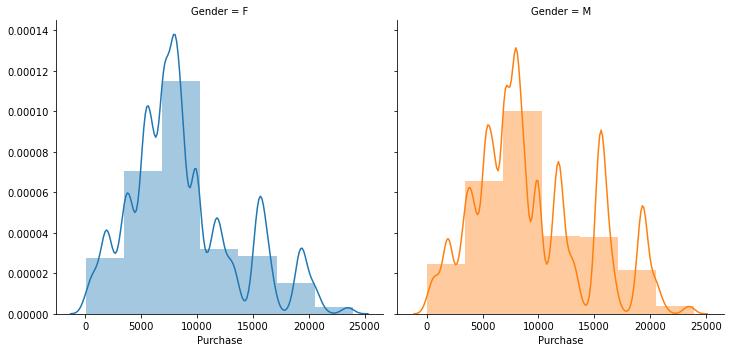

In [125]:
# 性別による金額の違いは出ているか確認
grid = sns.FacetGrid(train, col='Gender', hue='Gender', col_wrap=3, size=5)
grid.map(sns.distplot, 'Purchase', bins=7, kde=True)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

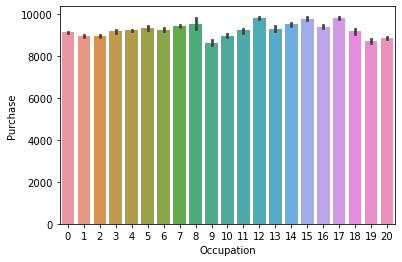

In [126]:
#占有時間と買い物金額の関係
sns.barplot(data=train,x='Occupation',y='Purchase')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

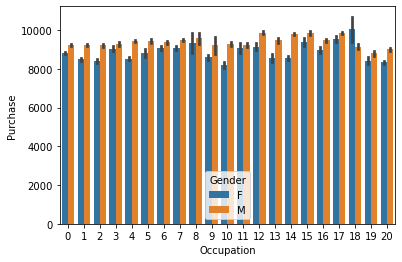

In [127]:
#上記に性別も加えてプロット
sns.barplot(data=train,x='Occupation',y='Purchase',hue='Gender')

性別には偏りがある。しかし、買い物金額に性別や占有時間の差はない。

### 外れ値の検出

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

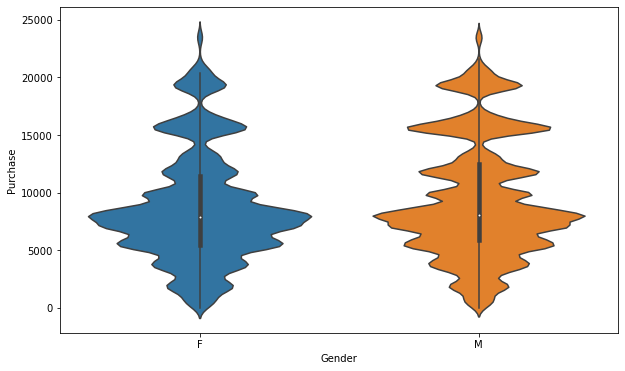

In [128]:
# 性別と金額
plt.figure(figsize=(10,6))
sns.violinplot(data=train,x='Gender',y='Purchase')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

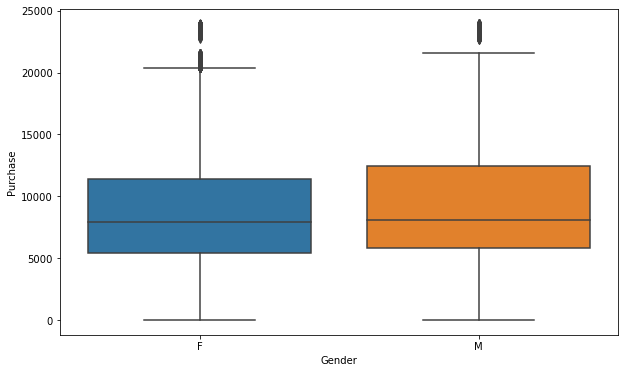

In [129]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train,x='Gender',y='Purchase')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

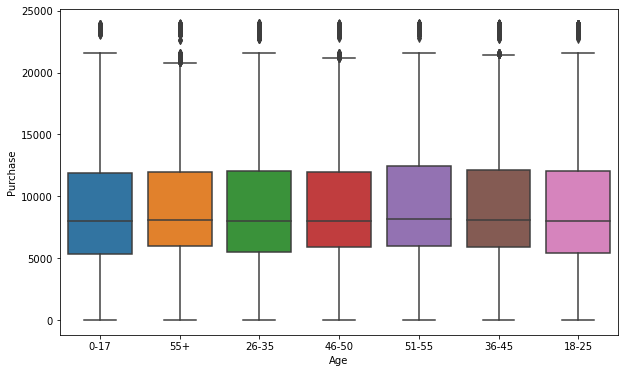

In [130]:
#　年齢と金額
plt.figure(figsize=(10,6))
sns.boxplot(data=train,x='Age',y='Purchase')

上の図では性別と年齢で大きな違いは出ていない。<br>
また、目立った外れ値も検出できない。

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

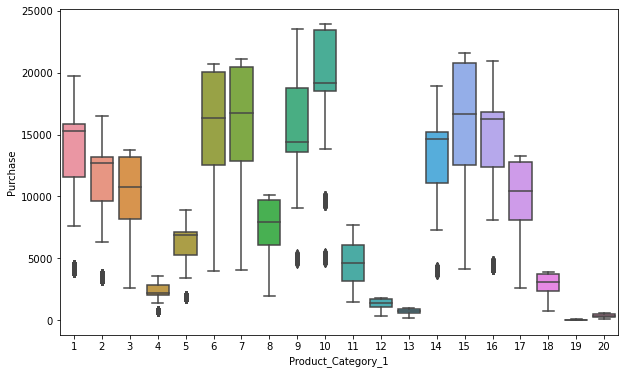

In [131]:
#　商品カテゴリと金額
plt.figure(figsize=(10,6))
sns.boxplot(data=train,x='Product_Category_1',y='Purchase')

上の図のカラムは特徴が出ている。

C:\Users\ritch\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

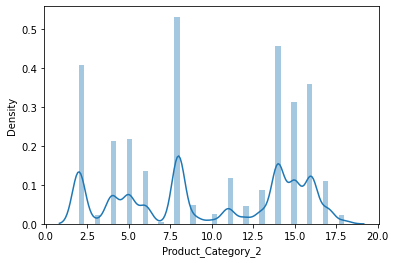

In [132]:
# Product_Category2の分布をみて、欠損値補完の参考に
sns.distplot(train['Product_Category_2'],kde=True)

## データの前処理

前処理では、まずは欠損が多すぎるものは使えないので削除<br>
そして、図で示したようにProduct_Category２は統計に偏りがあるので中央値で補完

### 欠損値への対応

In [133]:
# 欠損値の多いカラムの削除
train = train.drop(['Product_Category_3'],axis=1)

In [134]:
# 欠損値補完（ばらつきがあるので、平均ではなく中央値で）
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].median())

### ID群のデータ活用

このデータでは、User_IDとProduct_IDというカラムがある。<br>
IDと聞くとそれぞれのデータに割り振られたindex番号と思ってしまうが、<br>
これは重複があり、固有のユーザーと商品を表したものであることがわかる。

セールの金額を求めるので、ユーザーと商品の情報は特徴量として使える。<br>
なので、これは確実に特徴量として使っていく。<br>
※事前の分析でも影響があることがわかっている。

In [135]:
# Use_IDとProduct_IDが特徴であることを確認
print(train.shape[0],train['User_ID'].nunique())
print(train.shape[0],train['Product_ID'].nunique())

550068 5891
550068 3631


In [136]:
# Product_IDを加工して使えるようにする
#下６桁は固有番号なので、それ以外は削除
train['Product_ID'] = train['Product_ID'].str.replace('P00','')
ss = StandardScaler()
train['Product_ID'] = ss.fit_transform(train['Product_ID'].values.reshape(-1,1))

In [137]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.0,7969


### カテゴリーデータをラベルエンコーディング

In [138]:
# カテゴリデータを取り出して求めてエンコーディング
cat_cols=['Gender','City_Category','Age']
le = LabelEncoder()
for i in cat_cols:
  train[i] = le.fit_transform(train[i])
train.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

### データ内の数字や表記を変換

In [139]:
# ＋は余分なので削除,数値データに変換
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace('4+','4')
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype(int)

In [140]:
#City_categoryが整数値になっているので、カテゴリ型に変換
train['City_Category'] = train['City_Category'].astype('category')

In [141]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.0,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.0,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.0,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.0,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,1.924156,1,5,13,1,1,1,20,9.0,368
550064,1006035,1.953267,0,2,1,2,3,0,20,9.0,371
550065,1006036,1.953267,0,2,15,1,4,1,20,9.0,137
550066,1006038,1.953267,0,6,1,2,2,0,20,9.0,365


## ターゲットを対数変換

In [142]:
train['Purchase'] = np.log(train['Purchase'])

### カテゴリ変数をダミー変数化

In [143]:
train = pd.get_dummies(train)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.0,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.0,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.0,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.0,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.0,8.983314,0,0,1


In [144]:
# 特徴量と目的変数を分ける
X = train.drop('Purchase', axis=1)
Y = train['Purchase']

In [145]:
# 訓練と検証用に分割
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(440054, 12) (110014, 12) (440054,) (110014,)


In [146]:
## データを標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [147]:
X_train[:5]

array([[-1.36232641, -1.21436012,  0.57285267, -1.10597459,  1.21582779,
        -0.66528308,  1.20194133, -1.12043314, -0.37416631, -0.60675237,
         1.17497313, -0.67160581],
       [-0.86985315, -0.52895836,  0.57285267, -1.10597459,  0.29567739,
        -0.66528308,  1.20194133,  0.6593667 , -0.13735344, -0.60675237,
        -0.85108329,  1.48896866],
       [ 1.69204947,  0.46409532,  0.57285267,  1.1122723 ,  0.44903579,
         0.10999082,  1.20194133, -1.12043314, -1.79504351,  1.64811882,
        -0.85108329, -0.67160581],
       [ 1.73950283, -0.59224119, -1.74564954, -0.36655896,  1.06246939,
         1.66053861,  1.20194133, -0.10340466,  1.04671089, -0.60675237,
         1.17497313, -0.67160581],
       [ 0.51786822,  0.75032845,  0.57285267, -0.36655896,  0.60239419,
        -0.66528308,  1.20194133, -1.12043314, -1.79504351, -0.60675237,
        -0.85108329,  1.48896866]])

## モデル構築

モデルによる違いを出すために、3つのモデルで比較。<br>
評価はR2とRMSEで行います。<br>
モデルの当てはまり具合と差分の両方で評価していきます。

### 線形回帰モデル

In [148]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [149]:
y_predict = linear.predict(X_test)

In [150]:
# モデル評価
score=r2_score(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
print('r2_score:',score)
print('mse:',MSE)
print('rmse:',RMSE)

r2_score: -1.2346387815366308e+19
mse: 6.731166988083993e+18
rmse: 2594449264.8891773


### 決定木モデル

In [151]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [152]:
y_predict_train = DT.predict(X_train)
y_predict_test = DT.predict(X_test)

In [153]:
# モデル評価(RMSEとR2)
RMSE_TRAIN = np.sqrt(mean_squared_error(y_train,y_predict_train))
RMSE_TEST = np.sqrt(mean_squared_error(y_test,y_predict_test))
print('rmse_train:',RMSE_TRAIN)
print('rmse_test:',RMSE_TEST)
print('-'*30)
print('DT Train Score:',DT.score(X_train,y_train))
print('DT Train Score:',DT.score(X_test,y_test))

rmse_train: 0.0
rmse_test: 0.546517860853009
------------------------------
DT Train Score: 1.0
DT Train Score: 0.45215428470616226


### ランダムフォレスト

In [154]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [155]:
y_predict_train1 = RF.predict(X_train)
y_predict_test1 = RF.predict(X_test)

In [156]:
# モデル評価(RMSEとR2)
RMSE_TRAIN = np.sqrt(mean_squared_error(y_train,y_predict_train1))
RMSE_TEST = np.sqrt(mean_squared_error(y_test,y_predict_test1))
print('rmse_train:',RMSE_TRAIN)
print('rmse_test:',RMSE_TEST)
print('-'*30)
print('RF Train Score:',RF.score(X_train,y_train))
print('RF Train Score:',RF.score(X_test,y_test))

rmse_train: 0.13162643977125102
rmse_test: 0.39644520987026566
------------------------------
RF Train Score: 0.9684273711271854
RF Train Score: 0.7117190800058848


上記モデルだとランダムフォレストが一番良さそうですが、<br>
訓練データのスコアから**過学習している**ことがわかるので、ここから改良を加える。

## パラメータチューニング

上記の結果を見ると、決定木モデルでも過学習している。<br>
ランダムフォレストも同様なので、**木構造に制限を加える**ことで過学習を抑えてみる<br>
おそらく、枝分かれが多くて過学習をしてしまってるので、確かめてみる。

ちなみにしっかりと検証をするため、GridSearchなどは使用しない。

### ランダムフォレストのパラメータ調整

In [157]:
# インスタンスを立てるときにパラメータを設定
# 木構造の深さの限度を変えています。
RF_fix = RandomForestRegressor(max_depth=7, min_samples_leaf= 1,n_estimators= 100)
RF_fix.fit(X_train,y_train)

RandomForestRegressor(max_depth=7)

In [158]:
RF_fix.fit(X_train, y_train)

RandomForestRegressor(max_depth=7)

In [159]:
y_predict_train2 = RF_fix.predict(X_train)
y_predict_test2 = RF_fix.predict(X_test)

In [160]:
RMSE_TRAIN = np.sqrt(mean_squared_error(y_train,y_predict_train2))
RMSE_TEST = np.sqrt(mean_squared_error(y_test,y_predict_test2))
print('rmse_train:',RMSE_TRAIN)
print('rmse_test:',RMSE_TEST)
print('-'*30)
print('RF Train Score:',RF_fix.score(X_train,y_train))
print('RF Train Score:',RF_fix.score(X_test,y_test))

rmse_train: 0.3741649001973442
rmse_test: 0.3787532048289919
------------------------------
RF Train Score: 0.7448764411274139
RF Train Score: 0.7368749580252367


しっかり訓練データとテストデータのギャップを解消しています。<br>
さらにもともとの結果よりもよくなりました。

さらに**深さを決定した上で学習器の数を増やせば精度が上がるか**も試しました。

In [161]:
RF_fix_1 = RandomForestRegressor(max_depth=7, min_samples_leaf= 1,n_estimators= 200)
RF_fix_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [162]:
RF_fix_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200)

In [163]:
y_predict_train3 = RF_fix_1.predict(X_train)
y_predict_test3 = RF_fix_1.predict(X_test)

In [164]:
RMSE_TRAIN = np.sqrt(mean_squared_error(y_train,y_predict_train3))
RMSE_TEST = np.sqrt(mean_squared_error(y_test,y_predict_test3))
print('rmse_train:',RMSE_TRAIN)
print('rmse_test:',RMSE_TEST)
print('-'*30)
print('RF Train Score:',RF_fix_1.score(X_train,y_train))
print('RF Train Score:',RF_fix_1.score(X_test,y_test))

rmse_train: 0.3741710580387954
rmse_test: 0.3788754166176322
------------------------------
RF Train Score: 0.7448680436355452
RF Train Score: 0.7367051262211445


学習器の数を増やしても、モデルは改善できませんでした。<br>
学習器を増やしてもダメということは、モデルを変えるかデータを増やすかですが、<br>
ここはデータを変えた時のモデルの変化を見ていたため、これ以上のモデルは試しません。

### 決定木モデルでも検証

決定木も構造は同じなので、同じように調整して過学習を改善できるかも検証します。

In [165]:
DT_fix = DecisionTreeRegressor(max_depth=7)
DT_fix.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [166]:
y_predict_train4 = DT_fix.predict(X_train)
y_predict_test4 = DT_fix.predict(X_test)

In [167]:
RMSE_TRAIN = np.sqrt(mean_squared_error(y_train,y_predict_train4))
RMSE_TEST = np.sqrt(mean_squared_error(y_test,y_predict_test4))
print('rmse_train:',RMSE_TRAIN)
print('rmse_test:',RMSE_TEST)
print('-'*30)
print('DT Train Score:',DT_fix.score(X_train,y_train))
print('DT Train Score:',DT_fix.score(X_test,y_test))

rmse_train: 0.3752403999598221
rmse_test: 0.387272208528483
------------------------------
DT Train Score: 0.7434076786995083
DT Train Score: 0.7249053057385462


ランダムフォレストとほとんど変わりません、シンプルなモデルでも同じくらい精度になりました。<br>
計算速度も考えると決定木モデルを使うという選択肢もあります。

## モデルとデータの保存

他のノートブックでも違うモデルで楽に使えるように、<br>
処理済みのデータとモデルを保存します。

In [173]:
# モデルを保存
filename = 'RF_fix_model.sav'
pickle.dump(RF_fix, open(filename, 'wb'))

In [174]:
train.to_csv('preprocessed_train.csv')